In [ ]:
3.2

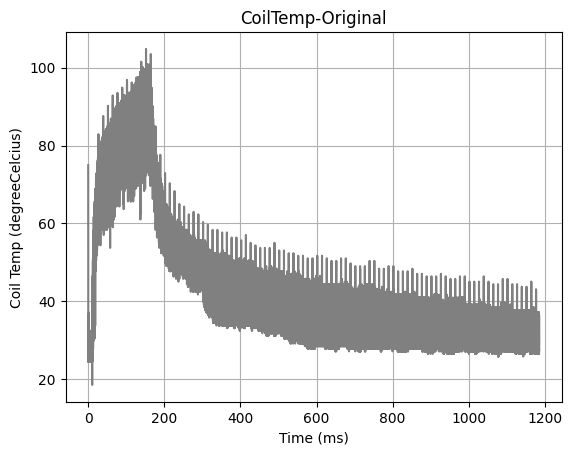

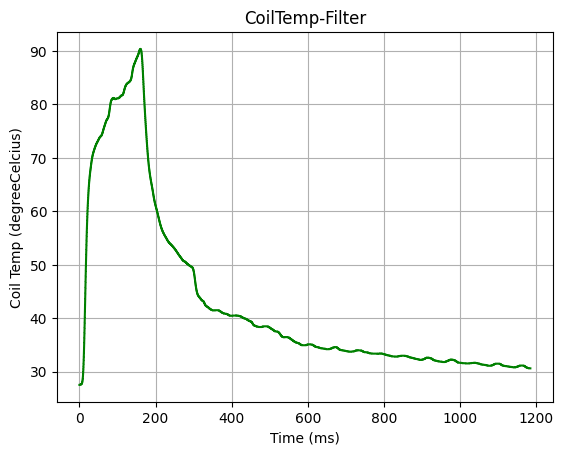

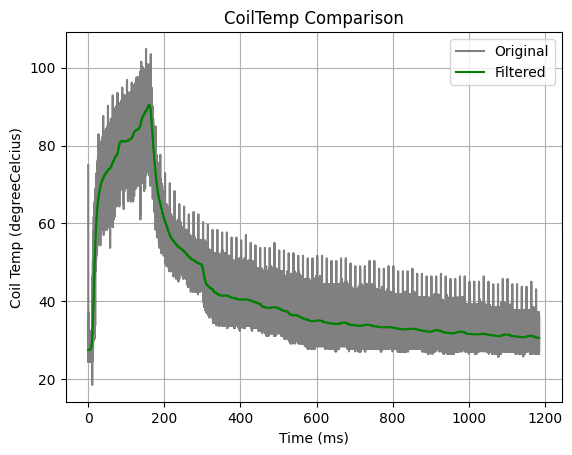

In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def process_h5_file(
    file_name, scaling_factor, scaling_offset, unit, sample_rate, original_color, filter_color, 
    original_title, filter_title, comparison_title, gaussian_weight):
    # 打开.h5文件以读取数据
    with h5py.File(file_name, 'r') as file:
        # 读取CoilTemp数据
        coil_temp_data = file['DAQ/TufADC/Data/CoilTemp'][:]

        # 存储原始数据
        coil_temp_original = coil_temp_data
        
        # 设计并应用均值滤波器
        coil_temp_filtered = gaussian_filter1d(coil_temp_data, sigma=gaussian_weight)
        
        
        # 将原始数据计算为显示数据
        coil_temp_original_display = (coil_temp_original / scaling_factor) - scaling_offset
        coil_temp_filtered_display = (coil_temp_filtered / scaling_factor) - scaling_offset        
        
        # 绘制原始数据图
        time = np.arange(0, len(coil_temp_data)) * sample_rate
        plt.figure()
        plt.plot(time, coil_temp_original_display, color=original_color)
        plt.title(original_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.grid(True)
        plt.show()
        
        # 绘制滤波后的数据图
        plt.figure()
        plt.plot(time, coil_temp_filtered_display, color=filter_color)
        plt.title(filter_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.grid(True)
        plt.show()
        
        # 绘制对比图
        plt.figure()
        plt.plot(time, coil_temp_original_display, color='grey', label='Original')
        plt.plot(time, coil_temp_filtered_display, color='green', label='Filtered')
        plt.title(comparison_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 创建一个新文件来保存滤波后的数据
    new_file_name = file_name.replace('.h5', '_filter.h5')
    with h5py.File(new_file_name, 'w') as new_file:
        # 复制原始文件中的所有内容
        with h5py.File(file_name, 'r') as file:
            for key in file.keys():
                file.copy(key, new_file)

            # 复制属性
            for attr_key in file.attrs.keys():
                new_file.attrs[attr_key] = file.attrs[attr_key]                

            if 'DAQ/TufADC/Data/CoilTemp' in new_file:
                old_dataset = new_file['DAQ/TufADC/Data/CoilTemp']
                # 保存原数据集的属性
                original_attributes = dict(old_dataset.attrs)

                # 删除旧的数据集
                del new_file['DAQ/TufADC/Data/CoilTemp']
            else:
                original_attributes = {}

            # 创建新的数据集并保存数据
            new_dataset = new_file.create_dataset('DAQ/TufADC/Data/CoilTemp', data=coil_temp_filtered)

            # 重新设置原数据集的属性
            for attr_key, attr_value in original_attributes.items():
                new_dataset.attrs[attr_key] = attr_value    

    
# 示例调用
process_h5_file(
    file_name='001_max100dC.h5',
    scaling_factor=22.9,
    scaling_offset=246,
    unit='degreeCelcius',
    sample_rate=0.00125,  # 1.25 ms
    original_color='grey',
    filter_color='green',
    original_title='CoilTemp-Original',
    filter_title='CoilTemp-Filter',
    comparison_title='CoilTemp Comparison',
    #window_size=5,  # Not used in gaussian_filter1d
    gaussian_weight=1000
)


In [ ]:
# import h5py
# import numpy as np

# def process_h5_file(file_name, coil_temp_filtered):
#     """
#     将滤波后的数据保存到 .h5 文件中的指定路径，同时保留原数据集的属性。

#     参数:
#     file_name (str): .h5 文件的名称
#     coil_temp_filtered (numpy.ndarray): 滤波后的数据
#     """
#     # 打开 .h5 文件
#     with h5py.File(file_name, 'a') as new_file:  # 'a' 模式表示可读写（存在文件时打开，不存在时创建）
#         # 检查是否已经存在 'DAQ/TufADC/Data/CoilTemp' 数据集
#         if 'DAQ/TufADC/Data/CoilTemp' in new_file:
#             old_dataset = new_file['DAQ/TufADC/Data/CoilTemp']
#             # 保存原数据集的属性
#             original_attributes = dict(old_dataset.attrs)

#             # 删除旧的数据集
#             del new_file['DAQ/TufADC/Data/CoilTemp']
#         else:
#             original_attributes = {}

#         # 创建新的数据集并保存数据
#         new_dataset = new_file.create_dataset('DAQ/TufADC/Data/CoilTemp', data=coil_temp_filtered)

#         # 重新设置原数据集的属性
#         for attr_key, attr_value in original_attributes.items():
#             new_dataset.attrs[attr_key] = attr_value

# # 示例调用
# coil_temp_filtered = np.array([1.0, 2.0, 3.0, 4.0])  # 示例数据
# process_h5_file('001_max100dC.h5', coil_temp_filtered)


In [6]:
# compare

In [7]:
# import h5py
# import numpy as np

# def compare_h5_files(file1, file2):
#     def compare_datasets(dataset1, dataset2):
#         if dataset1.shape != dataset2.shape:
#             print(f"Shape differs: {dataset1.name} vs {dataset2.name}")
#             return False
#         if dataset1.dtype != dataset2.dtype:
#             print(f"Data type differs: {dataset1.name} vs {dataset2.name}")
#             return False
#         if not np.array_equal(dataset1, dataset2):
#             print(f"Data differs: {dataset1.name} vs {dataset2.name}")
#             return False
#         return True

#     def compare_attributes(attrs1, attrs2):
#         if attrs1.keys() != attrs2.keys():
#             print("Different attributes:")
#             print("Attributes 1:", list(attrs1.keys()))
#             print("Attributes 2:", list(attrs2.keys()))
#             return False
#         for key in attrs1.keys():
#             if attrs1[key] != attrs2[key]:
#                 print(f"Attribute '{key}' differs")
#                 return False
#         return True

#     def compare_objects(obj1, obj2):
#         if isinstance(obj1, h5py.Dataset) and isinstance(obj2, h5py.Dataset):
#             return compare_datasets(obj1, obj2)
#         elif isinstance(obj1, h5py.Group) and isinstance(obj2, h5py.Group):
#             return compare_groups(obj1, obj2)
#         elif isinstance(obj1, h5py.AttributeManager) and isinstance(obj2, h5py.AttributeManager):
#             return compare_attributes(obj1.attrs, obj2.attrs)
#         else:
#             print(f"Non-dataset or non-group found in key: {obj1.name}")
#             return False

#     def compare_groups(group1, group2):
#         keys1 = set(group1.keys())
#         keys2 = set(group2.keys())
#         if keys1 != keys2:
#             print(f"Different keys in group '{group1.name}':")
#             print("Group 1:", keys1)
#             print("Group 2:", keys2)
#         for key in keys1.intersection(keys2):
#             obj1 = group1[key]
#             obj2 = group2[key]
#             if not compare_objects(obj1, obj2):
#                 print(f"Objects differ in group: {key}")

#     with h5py.File(file1, 'r') as f1, h5py.File(file2, 'r') as f2:
#         compare_groups(f1, f2)
#         compare_attributes(f1.attrs, f2.attrs)

# # Example usage
# compare_h5_files('001_max100dC.h5', '001_max100dC_filter.h5')


In [ ]:
3.0 copy the attribute

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def process_h5_file(
    file_name, scaling_factor, scaling_offset, unit, sample_rate, original_color, filter_color, 
    original_title, filter_title, comparison_title, gaussian_weight):
    # 打开原始.h5文件以读取数据
    with h5py.File(file_name, 'r') as file:
        # 从文件中读取 'CoilTemp' 数据集
        coil_temp_data = file['DAQ/TufADC/Data/CoilTemp'][:]

        # 直接将原始数据存储在 coil_temp_original 中
        coil_temp_original = coil_temp_data

        # 对数据应用高斯滤波器
        coil_temp_filtered = gaussian_filter1d(coil_temp_data, sigma=gaussian_weight)

        # 将数据进行单位换算和偏移计算，准备绘图
        coil_temp_original_display = (coil_temp_original / scaling_factor) - scaling_offset
        coil_temp_filtered_display = (coil_temp_filtered / scaling_factor) - scaling_offset        

        # 生成时间轴数据
        time = np.arange(0, len(coil_temp_data)) * sample_rate
        
        # 绘制原始数据图
        plt.figure()
        plt.plot(time, coil_temp_original_display, color=original_color)
        plt.title(original_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.grid(True)
        plt.show()
        
        # 绘制滤波后的数据图
        plt.figure()
        plt.plot(time, coil_temp_filtered_display, color=filter_color)
        plt.title(filter_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.grid(True)
        plt.show()
        
        # 绘制原始数据和滤波数据的对比图
        plt.figure()
        plt.plot(time, coil_temp_original_display, color='grey', label='Original')
        plt.plot(time, coil_temp_filtered_display, color='green', label='Filtered')
        plt.title(comparison_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 创建一个新文件来保存滤波后的数据
    new_file_name = file_name.replace('.h5', '_filter.h5')
    with h5py.File(new_file_name, 'w') as new_file:
        # 重新打开原始文件以复制数据和属性
        with h5py.File(file_name, 'r') as file:
            # 复制所有内容
            for key in file.keys():
                file.copy(key, new_file)
            
            # 删除新文件中的 'CoilTemp' 数据集（如果存在）
            if 'DAQ/TufADC/Data/CoilTemp' in new_file:
                del new_file['DAQ/TufADC/Data/CoilTemp']
            
            # 保存滤波后的数据集
            new_file.create_dataset('DAQ/TufADC/Data/CoilTemp', data=coil_temp_filtered)
            
            # 复制属性
            for attr_key in file.attrs.keys():
                new_file.attrs[attr_key] = file.attrs[attr_key]
# 示例调用
process_h5_file(
    file_name='001_max100dC.h5',
    scaling_factor=22.9,
    scaling_offset=246,
    unit='degreeCelcius',
    sample_rate=0.00125,  # 1.25 ms
    original_color='grey',
    filter_color='green',
    original_title='CoilTemp-Original',
    filter_title='CoilTemp-Filter',
    comparison_title='CoilTemp Comparison',
    gaussian_weight=1000
)


In [8]:
# 3.1 also copy the attribute of Rewrited CoilTemp

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def process_h5_file(
    file_name, scaling_factor, scaling_offset, unit, sample_rate, original_color, filter_color, 
    original_title, filter_title, comparison_title, gaussian_weight):
    
    # 打开原始.h5文件以读取数据
    with h5py.File(file_name, 'r') as file:
        # 读取 'CoilTemp' 数据集
        coil_temp_data = file['DAQ/TufADC/Data/CoilTemp'][:]

        # 原始数据
        coil_temp_original = coil_temp_data

        # 应用高斯滤波器
        coil_temp_filtered = gaussian_filter1d(coil_temp_data, sigma=gaussian_weight)

        # 转换为可绘制的数据
        coil_temp_original_display = (coil_temp_original / scaling_factor) - scaling_offset
        coil_temp_filtered_display = (coil_temp_filtered / scaling_factor) - scaling_offset        

        # 生成时间轴
        time = np.arange(0, len(coil_temp_data)) * sample_rate
        
        # 绘制图像
        plt.figure()
        plt.plot(time, coil_temp_original_display, color=original_color)
        plt.title(original_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.grid(True)
        plt.show()
        
        plt.figure()
        plt.plot(time, coil_temp_filtered_display, color=filter_color)
        plt.title(filter_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.grid(True)
        plt.show()
        
        plt.figure()
        plt.plot(time, coil_temp_original_display, color='grey', label='Original')
        plt.plot(time, coil_temp_filtered_display, color='green', label='Filtered')
        plt.title(comparison_title)
        plt.xlabel('Time (ms)')
        plt.ylabel(f'Coil Temp ({unit})')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 创建一个新文件来保存滤波后的数据
    new_file_name = file_name.replace('.h5', '_filter.h5')
    with h5py.File(new_file_name, 'w') as new_file:
        # 重新打开原始文件以复制数据和属性
        with h5py.File(file_name, 'r') as file:
            # 复制所有内容
            for key in file.keys():
                file.copy(key, new_file)
            
            # 检查是否已经存在 'DAQ/TufADC/Data/CoilTemp' 数据集
            if 'DAQ/TufADC/Data/CoilTemp' in new_file:
                # 读取旧数据集的属性
                old_dataset = new_file['DAQ/TufADC/Data/CoilTemp']
                old_attributes = dict(old_dataset.attrs)
                
                # 删除旧数据集
                del new_file['DAQ/TufADC/Data/CoilTemp']
                
                # 创建新数据集并保存滤波后的数据
                new_dataset = new_file.create_dataset('DAQ/TufADC/Data/CoilTemp', data=coil_temp_filtered)
                
                # 复制旧数据集的属性到新数据集
                for attr_key, attr_value in old_attributes.items():
                    new_dataset.attrs[attr_key] = attr_value
            else:
                # 如果新文件中没有 'CoilTemp' 数据集，直接创建并保存滤波后的数据集
                new_file.create_dataset('DAQ/TufADC/Data/CoilTemp', data=coil_temp_filtered)
        
        # 复制原始文件的属性到新文件中
        with h5py.File(file_name, 'r') as file:
            for attr_key in file.attrs.keys():
                new_file.attrs[attr_key] = file.attrs[attr_key]

# 示例调用
process_h5_file(
    file_name='001_max100dC.h5',
    scaling_factor=22.9,
    scaling_offset=246,
    unit='degreeCelcius',
    sample_rate=0.00125,  # 1.25 ms
    original_color='grey',
    filter_color='green',
    original_title='CoilTemp-Original',
    filter_title='CoilTemp-Filter',
    comparison_title='CoilTemp Comparison',
    gaussian_weight=1000
)
